<a href="https://colab.research.google.com/github/GodfreyAchu/Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
class Layer:
    def __init__(self, n_input, n_neuron):

        self.weights = np.random.rand(n_input, n_neuron)
        self.bias = np.ones(n_neuron)

    def Net_input(self, x):
        self.net_input = np.dot(x, self.weights) + self.bias
        return self.net_input

    def activation(self, x):
        self.output = 1 / (1 + np.exp(-self.Net_input(x)))
        return self.output


    def activation_drv(self, s):
        return s - s**2

In [8]:
class MultilayerPerceptron:

    def __init__(self, n_layer, n_neuron, n_input, n_output):

        self.layers = []

        self.layers.append(Layer(n_input, n_neuron))
        [self.layers.append(Layer(n_neuron, n_neuron)) for i in range(1, n_layer-1)]
        self.layers.append(Layer(n_neuron, n_output))

    def feed_forward(self, x):

        for layer in self.layers:
            x = layer.activation(x)

        return x
    def back_propagation(self, x, y, l_rate, momentum):

        o_i = self.feed_forward(x)

        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            s_i = layer

            if layer != self.layers[-1]:
                layer.delta = np.dot(layer.activation_drv(layer.output),
                                     np.dot(self.layers[i+1].weights, self.layers[i+1].delta))

            else:
                layer.error = y - o_i
                layer.delta = layer.error * layer.activation_drv(o_i)


        for i, layer in enumerate(self.layers):
            layer = self.layers[i]
            output_i = np.atleast_2d(x if i == 0 else self.layers[i - 1].output)
            layer.weights = layer.delta * output_i.T * l_rate + (layer.weights * momentum)
    def train(self, x, y, l_rate, momentum, n_iter):

        costs =[]

        for i in range(n_iter):
            for xi, yi in zip(x, y):
                self.back_propagation(xi, yi, l_rate, momentum)
            cost = np.sum((y-self.feed_forward(x))**2) / 2.0
            costs.append(cost)

        return costs

    def predict(self, x):
        outputs = (self.feed_forward(x)).tolist()

        return outputs.index(max(outputs))


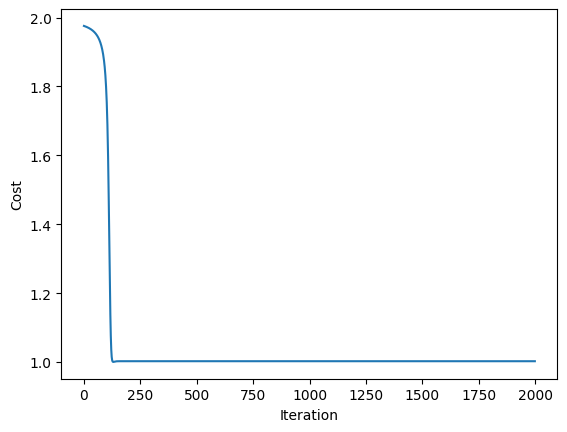

In [9]:
x = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

xorSet = MultilayerPerceptron(4, 8, 2, 2)

costs = xorSet.train(x, y, 0.1, 1, 2000)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

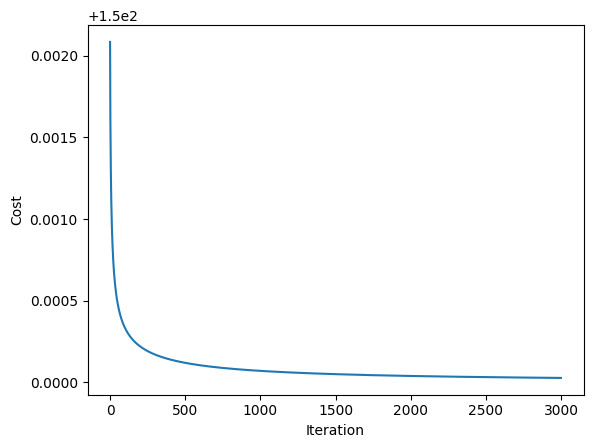

In [10]:
from mlxtend.data import iris_data
x, y = iris_data()
y = y.reshape((150,1))

irisSet = MultilayerPerceptron(4, 12, 4, 3)

costs = irisSet.train(x, y, 0.3, 1, 3000)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()